# final project 

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://images1.calcalist.co.il/PicServer3/2017/11/09/770606/ABB_l.jpg",width=600, height=600)


### The Dataset
#### <div align="right">הדאטה שבחרנו לעבוד עליו עוסק בנתונים שניתנו על ידי ארגון חברות תעופה ,השם האמיתי של החברה לא ניתן בגלל מטרות שונות 
#### <div align="right"> מערך הנתונים מורכב מפרטי הלקוחות שכבר טסו איתם
#### <div align="right">הנתונים מורכבים משירותים שונים המתבססים על דירוג בין 0-5 
#### <div align="right">המטרה העיקרית שלשמה עשינו את הפרויקט היא להציג מספר של שירותים שעל חברות התעופה להשתפר כדי להצליח לייצר לקוחות מרוצים יותר
#### <div align="right">הדאטה נלקחה מתוך אתר ״קגל״ בקישור הבא:
# <div align="right">[kaggle](https://www.kaggle.com/sjleshrac/airlines-customer-satisfaction)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_error

In [3]:
url='https://raw.githubusercontent.com/shonbs/datasince2021/main/Invistico_Airline.csv'
airline=pd.read_csv(url)

airline.tail()



,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,5,2,2,3,3,4,4,4,2,0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,1,3,2,3,3,1,2,1,174
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,2,4,4,3,4,2,3,2,155
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,2,3,3,2,3,2,1,2,193
129879,dissatisfied,Female,disloyal Customer,38,Personal Travel,Eco,4307,3,4,3,...,3,3,4,5,5,5,3,3,3,185


# <div align="right"> סידור הדאטה  

In [4]:
airline.isnull().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
dtype: int64

In [5]:
airline.dtypes

satisfaction                         object
Gender                               object
Customer Type                        object
Age                                   int64
Type of Travel                       object
Class                                object
Flight Distance                       int64
Seat comfort                          int64
Departure/Arrival time convenient     int64
Food and drink                        int64
Gate location                         int64
Inflight wifi service                 int64
Inflight entertainment                int64
Online support                        int64
Ease of Online booking                int64
On-board service                      int64
Leg room service                      int64
Baggage handling                      int64
Checkin service                       int64
Cleanliness                           int64
Online boarding                       int64
Departure Delay in Minutes            int64
dtype: object

#### <div align="right">  במהלך בדיקת הנתונים ראינו שאין שום עמודה בעייתית - מבחינת ערכים חסרים וטיפוס המשתנה    

# <div align="right"> היכרות עם הלקוחות 

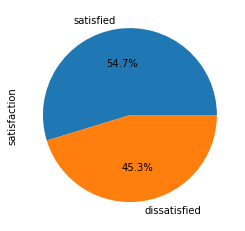

In [6]:
airline['satisfaction'].value_counts().plot.pie(autopct='%1.1f%%')

#### <div align="right"> הצגת חלוקת שביעות רצון של כלל הלקוחות 

In [7]:
airline['Gender'].value_counts()

Female    65899
Male      63981
Name: Gender, dtype: int64

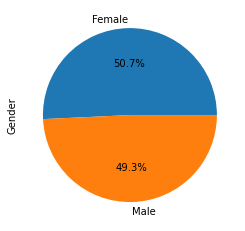

In [8]:
airline['Gender'].value_counts().plot.pie(autopct='%1.1f%%')

###### <div align="right"> ניתן לראות שבנתונים שאנו מציגים יש מעט יותר נשים מגברים 

In [9]:
airline.groupby(['satisfaction','Gender']).Gender.agg(['count'])

count
satisfaction Gender       
dissatisfied Female  22971
             Male    35822
satisfied    Female  42928
             Male    28159

##### <div align="right"> חלוקת שביעות רצון לפי מגדר,ניתן לראות שיש יותר נשים מרוצות מאשר גברים

In [10]:
airline['Age'].mean()

39.42795657530028

In [11]:
age = pd.cut(airline['Age'], [0, 20,40,60,90])
airline.groupby(['satisfaction',age])[['Age']].count()

Age
satisfaction Age            
dissatisfied (0, 20]    7998
             (20, 40]  27428
             (40, 60]  17715
             (60, 90]   5652
satisfied    (0, 20]    6060
             (20, 40]  25786
             (40, 60]  34839
             (60, 90]   4402

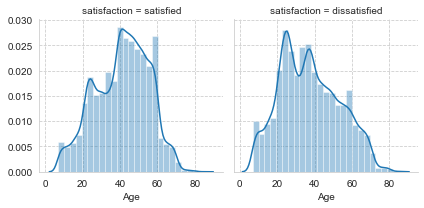

In [12]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})
g=sns.FacetGrid(airline,col='satisfaction')
g.map(sns.distplot,"Age",bins=25)
plt.show()

##### <div align="right"> הצגנו חלוקה של שביעות רצון לפי טווחי גילאים . ניתן לראות כי הטווח של הגילאים 20-40 הם הקבוצה הכי פחות מרוצה בתוך הטווחים בקבוצה של הלא מרוצים.  

# <div align="right"> בדיקת קורולציה על כלל הנתונים

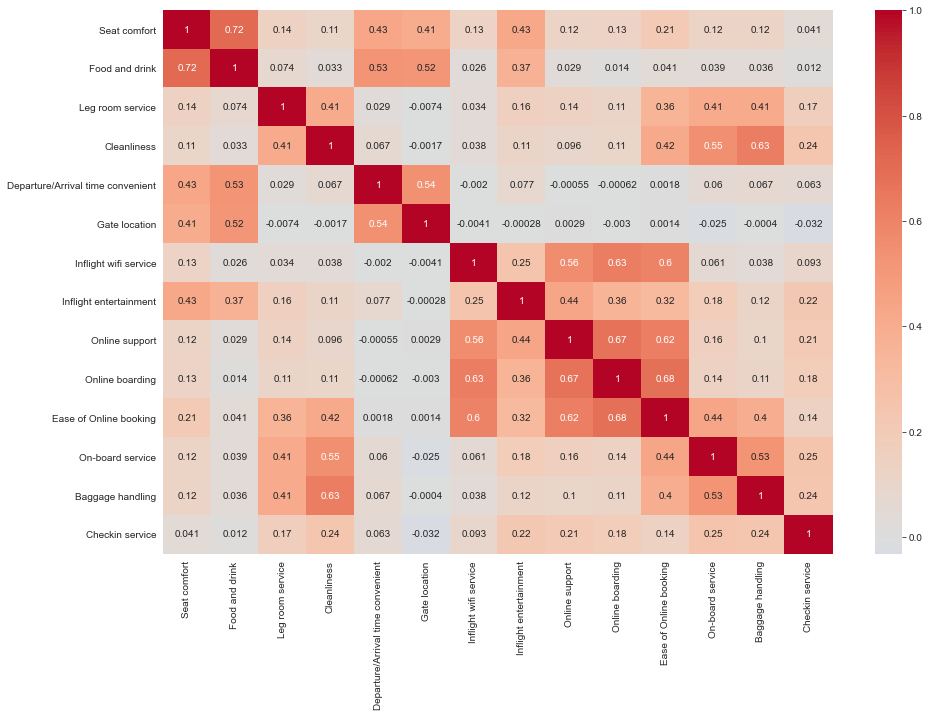

In [13]:
 airlinecor = airline[['Seat comfort','Food and drink','Leg room service','Cleanliness' ,'Departure/Arrival time convenient','Gate location','Inflight wifi service','Inflight entertainment','Online support','Online boarding','Ease of Online booking','On-board service','Baggage handling','Checkin service',]]
corrs = airlinecor.corr(method = 'pearson')
plt.figure(figsize=(15,10))  #figure size
sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True);  

# <div align="right"> תובנה מס׳ 1: שירותי שדה 

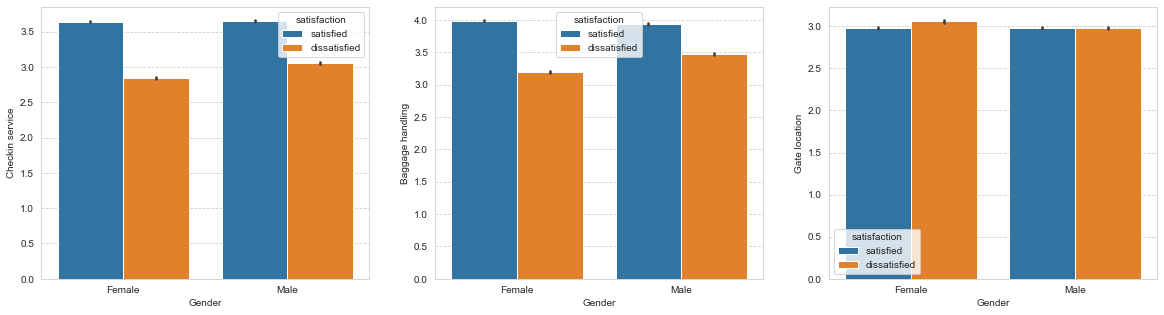

In [14]:
fig, axes = plt.subplots(figsize=(20, 5), ncols=3,)
sns.barplot(ax=axes[0],x="Gender", y ="Checkin service" ,hue="satisfaction", data=airline)
sns.barplot(ax=axes[1],x="Gender", y ="Baggage handling",hue="satisfaction", data=airline)
sns.barplot(ax=axes[2], x="Gender", y="Gate location", hue="satisfaction" ,  data=airline)
plt.show()

#### <div align="right">  בתובנה הראשונה נגענו בשלוש נקודות הראשונות שעוסקות בשירותי השדה טרם הנסיעה
#### <div align="right"> כאשר בן אדם מגיע לשדה השלוש דברים הראשונים בהם הוא נתקל הם     
#### <div align="right">א) עמדת הצ'ק אין
#### <div align="right">ב) שילוח תיקים
#### <div align="right">ג) שער עליה למטוס
#### <div align="right">ניתן לראות שבניגוד לדירוג עבור עמדת הצ׳ק אין ועבור שילוח התיקים , בדירוג עבור שער העליה למטוס ישנה עליה באי שביעות רצון בקרב הנשים   ושיוויון בין הגברים 
#### <div align="right">במסקנה שלנו אנו ממליצים לחברת התעופה לעשות הכל בכדי לגרום לשביעות רצון בקרב האנשים , ושיתחילו את חוויית הטיסה שלהם בתחושה טובה  
#### <div align="right">אמנם שערי העלייה הינם קבועים ואינן ברי שינוי אך אנחנו כחברה צריכים לשאוף למקם את המטוסים שלנו בשערים הקרובים ביותר. שכן זהו המפגש  הראשון של הנוסע עם החברה ועלינו ליצור תחושה נעימה אצל הלקוח . שכן אין שני לרושם ראשוני 



# <div align="right">תובנה מס׳2: שירותי אינטרנט

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B4E3F5B6A0>,
      dtype=object)

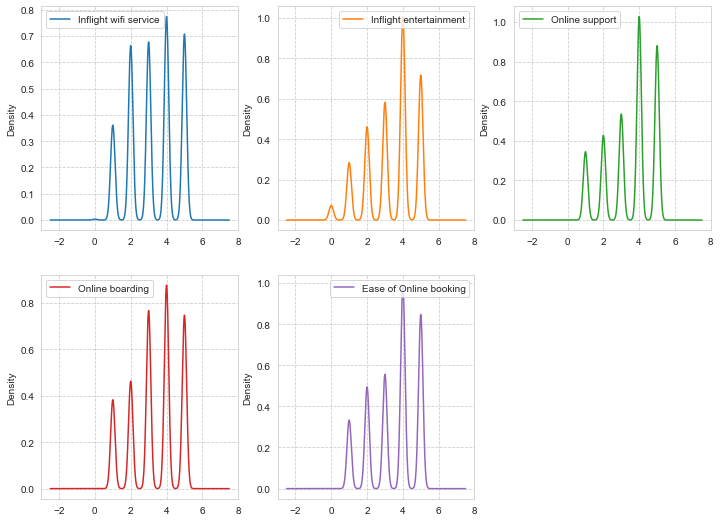

In [15]:
features=['Inflight wifi service','Inflight entertainment','Online support','Online boarding','Ease of Online booking']
airline[features].plot.density(subplots=True, sharex=False, sharey=False, layout=(3, 3), figsize=(12,14))

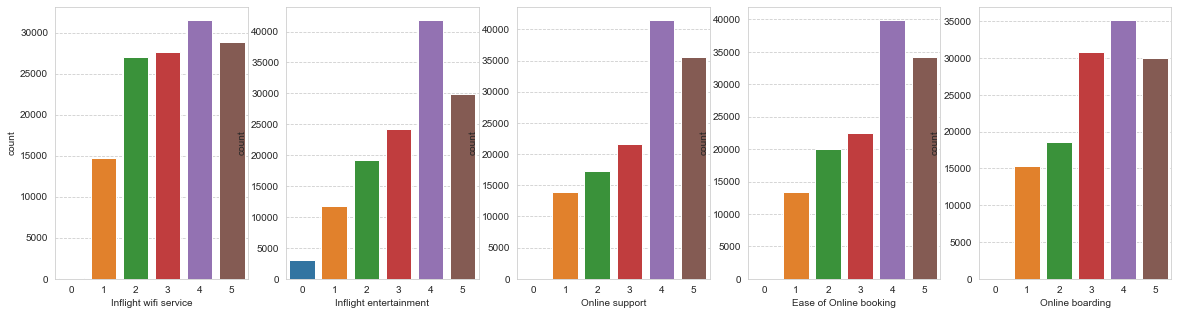

In [16]:
fig, axes = plt.subplots(figsize=(20, 5), ncols=5,)
sns.countplot(ax=axes[0], x="Inflight wifi service", data=airline)
sns.countplot(ax=axes[1], x="Inflight entertainment", data=airline)
sns.countplot(ax=axes[2], x="Online support", data=airline)
sns.countplot(ax=axes[3], x="Ease of Online booking", data=airline)
sns.countplot(ax=axes[4], x='Online boarding', data=airline)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B4E3B3FEE0>]],
      dtype=object)

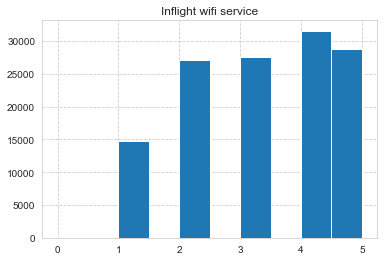

In [17]:
airline.hist('Inflight wifi service')

### <div align="right">בתובנה השניה נגענו בכל נושא הרשתיות ואינטרנט. לפי צפיפות הנתונים הבחנו שישנה קפיצת מדרגה בנתוני האינטרנט במהלך הטיסה
### <div align="right">בחרנו להמחיש זאת בצורה מספרית בעזרת היסטוגרמה כדי שנוכל לראות את מספר הדירוגים ואת מספר האנשים שדירגו
### <div align="right">בניגוד לשאר הגרפים, בגרף העוסק באינטרנט שבמטוס, ישנן מדרגות שוות באופן יחסי עם מספרים גבוהים
### <div align="right">לפי כך מצאנו כי תחום האינטרנט שבמטוס הוא התחום החלש ביותר
### <div align="right">אנו ממליצים לחברת התעופה להשקיע את המשאבים בהקמת תשתיות רשת יותר טובות במטוסים על מנת להבטיח שירות אינטרנט טוב יותר במהלך הטיסה ולקדם את תחום הטכנולוגיה


# <div align="right">תובנה מס׳ 3: שירותי טיסה

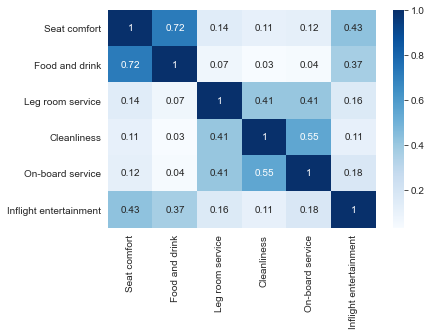

In [18]:
features_1 = ['Seat comfort','Food and drink','Leg room service','Cleanliness', 'On-board service', 'Inflight entertainment']
correlation_matrix = airline[features_1].corr().round(2)
sns.heatmap(data=correlation_matrix,cmap='Blues', annot=True)

### <div align="right"> בתוך התחום של שירותי הטיסה חשבנו שנראה קשר חזק בין נוחות הכיסא לבין המקום של הרגליים. מבחינתנו דירוג של נוחות כסא מתבטאת גם עם המקום של הרגליים ולכן הופתענו לגלות שהקשר נמוך

airline.groupby(['satisfaction','Class']).Gender.agg(['count'])

In [19]:
airlineb=airline.loc[airline.Class=='Business']
airlineb= airlineb.loc[airlineb.satisfaction=='dissatisfied']
airlineb

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes
821,dissatisfied,Male,Loyal Customer,47,Personal Travel,Business,365,1,0,1,...,4,5,3,3,1,3,3,3,4,0
836,dissatisfied,Male,Loyal Customer,18,Personal Travel,Business,3046,1,0,1,...,1,2,3,4,5,5,5,5,3,13
893,dissatisfied,Male,Loyal Customer,46,Personal Travel,Business,465,1,0,1,...,5,4,2,2,1,2,5,2,5,0
900,dissatisfied,Male,Loyal Customer,59,Personal Travel,Business,315,1,0,1,...,4,4,5,5,1,5,4,5,3,0
909,dissatisfied,Male,Loyal Customer,56,Personal Travel,Business,57,1,0,1,...,4,5,3,3,1,3,3,3,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129844,dissatisfied,Female,disloyal Customer,70,Personal Travel,Business,1748,3,5,0,...,0,1,1,3,5,4,3,4,1,0
129847,dissatisfied,Female,disloyal Customer,20,Personal Travel,Business,2946,3,5,3,...,3,3,3,3,3,5,3,5,3,8
129853,dissatisfied,Female,disloyal Customer,14,Personal Travel,Business,1966,3,5,3,...,3,1,1,5,5,4,4,4,1,0
129856,dissatisfied,Female,disloyal Customer,53,Personal Travel,Business,4000,4,5,4,...,4,1,1,4,2,5,3,5,1,0


In [20]:
airlineb.mean()

Age                                    39.180736
Flight Distance                      2192.377526
Seat comfort                            2.416551
Departure/Arrival time convenient       2.843842
Food and drink                          2.801716
Gate location                           2.997564
Inflight wifi service                   2.882701
Inflight entertainment                  2.763465
Online support                          2.973817
Ease of Online booking                  2.675394
On-board service                        2.886078
Leg room service                        2.869250
Baggage handling                        3.194354
Checkin service                         2.899197
Cleanliness                             3.195129
Online boarding                         2.707224
Departure Delay in Minutes             17.696208
dtype: float64

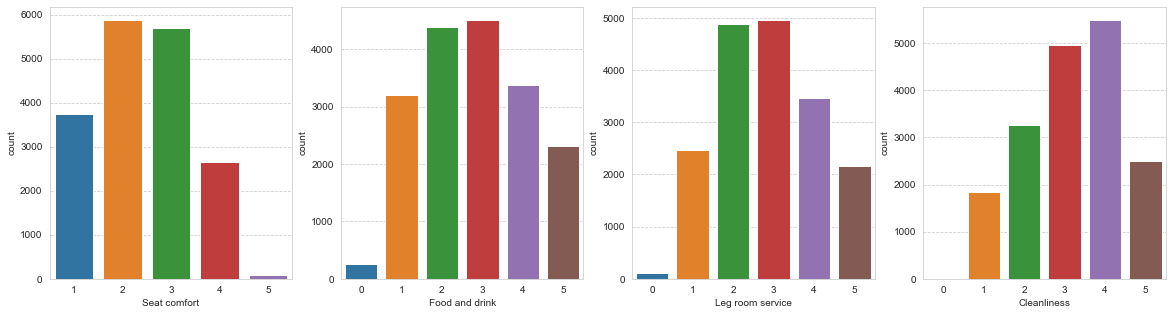

In [21]:
fig, axes = plt.subplots(figsize=(20, 5), ncols=4,)
sns.countplot(ax=axes[0], x="Seat comfort", data=airlineb)
sns.countplot(ax=axes[1], x="Food and drink", data=airlineb)
sns.countplot(ax=axes[2], x="Leg room service", data=airlineb)
sns.countplot(ax=axes[3], x="Cleanliness", data=airlineb)
plt.show()

### <div align="right"> לאחר שניסינו למצוא קשרים חזקים בין שירותי הטיסה השונים, וראינו שהקשרים אינם חזקים כפי שציפינו ,בחרנו לבדוק את נושא השביעות רצון בקרב שירותי הטיסה במחלקות השונות. לאחר שראינו שבמחלקת עסקים, יש 18,065 אנשים שאינם מרוצים משירותי הטיסה על אף המחיר שהם משלמים כדי לקבל חווית טיסה ברמה יותר גבוהה, החלטנו לגשת אל המחלקה הזו ספציפית ולבדוק את הדירוגים בשירותי הטיסה
### <div align="right">ראינו שנוחות המושב הוא השירות בעל הדירוג הנמוך ביותר
### <div align="right">אנו ממליצים לחברה לשפר את המושבים שבמחלקה זו. הלקוחות משלמים יותר עבור חווית טיסה ברמה גבוהה יותר מהמחלקות האחרות אשר חלק מביטוייהן היא נוחות המושב אשר מורגשת במהלך כל הטיסה
